In [20]:
import pandas as pd

# Load the dataset to inspect its structure
file_path = '/Users/yann/Desktop/spe-data/Household_power_consumption2.csv'
df = pd.read_csv(file_path, sep=',', low_memory=False)
df.columns, df.head()


(Index(['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
        'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
        'Sub_metering_3', 'sub_metering_4'],
       dtype='object'),
               datetime  Global_active_power  Global_reactive_power  Voltage  \
 0  2006-12-16 17:24:00                4.216                  0.418   234.84   
 1  2006-12-16 17:25:00                5.360                  0.436   233.63   
 2  2006-12-16 17:26:00                5.374                  0.498   233.29   
 3  2006-12-16 17:27:00                5.388                  0.502   233.74   
 4  2006-12-16 17:28:00                3.666                  0.528   235.68   
 
    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
 0              18.4             0.0             1.0            17.0   
 1              23.0             0.0             1.0            16.0   
 2              23.0             0.0             2.0            17.0   
 3              23

datetime


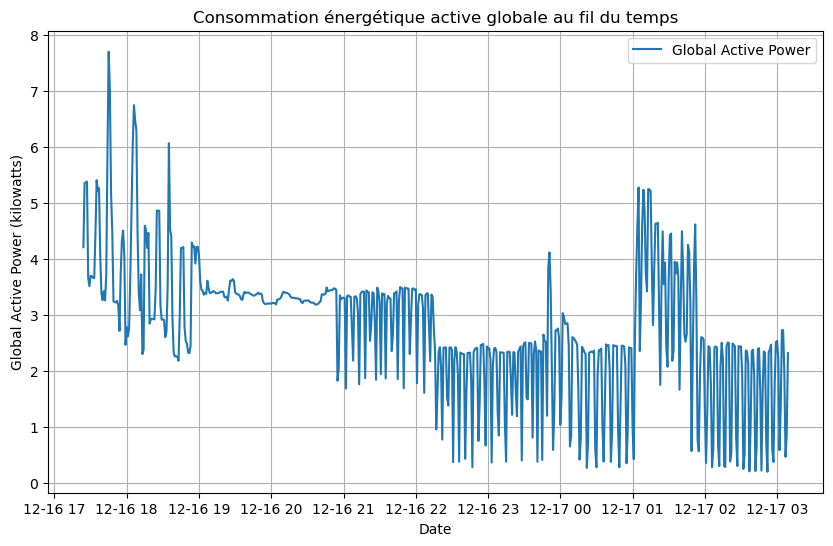

In [21]:

import matplotlib.pyplot as plt
print(df.columns[0])
## Convert the 'datetime' column to a datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Set the datetime column as the index
df.set_index('datetime', inplace=True)

# Plot the 'Global_active_power' to visualize trends and seasonality
plt.figure(figsize=(10, 6))
plt.plot(df['Global_active_power'], label='Global Active Power')
plt.title('Consommation énergétique active globale au fil du temps')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

# Test de Dickey-Fuller augmenté (ADF) sur la série 'Global_active_power'
adf_result = adfuller(df['Global_active_power'].dropna())

# Output the results
adf_result_output = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Critical Values': adf_result[4]
}
adf_result_output


{'ADF Statistic': -1.890490727254134,
 'p-value': 0.33654771121457294,
 'Critical Values': {'1%': -3.441956369604407,
  '5%': -2.8666599744723045,
  '10%': -2.5694967895716014}}

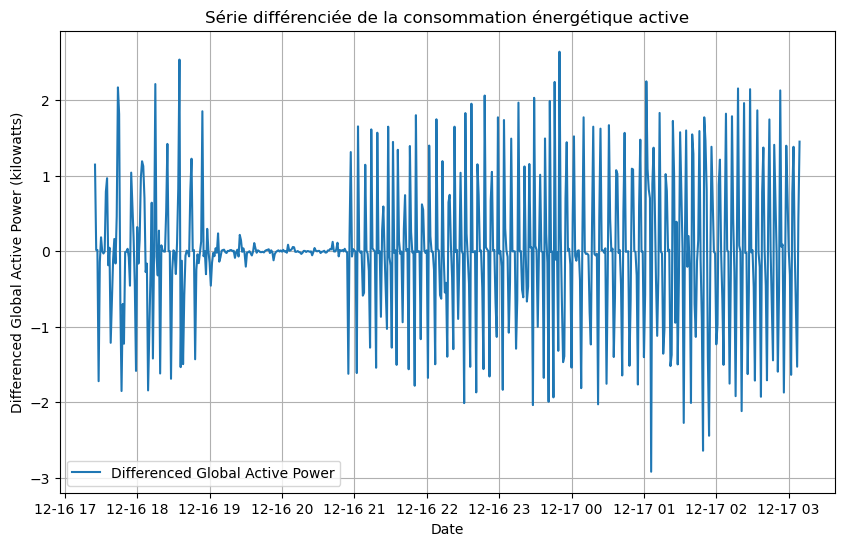

{'ADF Statistic': -8.799905647811084,
 'p-value': 2.126133559125708e-14,
 'Critical Values': {'1%': -3.4419770063102213,
  '5%': -2.866669060591297,
  '10%': -2.5695016312945413}}

In [23]:
# Applying first-order differencing to stationarize the series
df['Global_active_power_diff'] = df['Global_active_power'].diff()

# Drop NaN values introduced by differencing
df_diff = df['Global_active_power_diff'].dropna()

# Re-run the ADF test on the differenced series
adf_result_diff = adfuller(df_diff)

# Output the results of the differenced series
adf_result_diff_output = {
    'ADF Statistic': adf_result_diff[0],
    'p-value': adf_result_diff[1],
    'Critical Values': adf_result_diff[4]
}

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df_diff, label='Differenced Global Active Power')
plt.title('Série différenciée de la consommation énergétique active')
plt.xlabel('Date')
plt.ylabel('Differenced Global Active Power (kilowatts)')
plt.legend()
plt.grid(True)
plt.show()

adf_result_diff_output


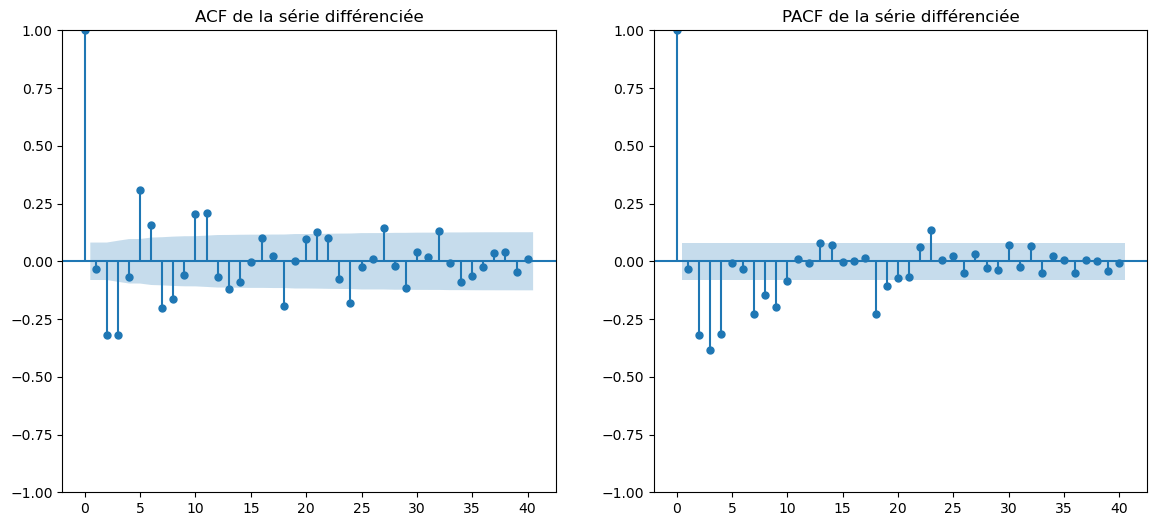

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF for the differenced series
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df_diff, lags=40, ax=plt.gca())
plt.title('ACF de la série différenciée')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df_diff, lags=40, ax=plt.gca())
plt.title('PACF de la série différenciée')

plt.show()


In [26]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings from ARIMA convergence issues
warnings.filterwarnings("ignore")

# Define the range of p, d, q parameters to test
p = d = q = range(0, 3)

# Generate all combinations of p, d, q
pdq_combinations = list(itertools.product(p, d, q))

# Create a dataframe to store the results
results = []

# Iterate over all parameter combinations to find the best ARIMA model
for param in pdq_combinations:
    try:
        model = ARIMA(df['Global_active_power'], order=param)
        result = model.fit()
        results.append((param, result.aic))
    except:
        continue

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['pdq', 'AIC']).sort_values(by='AIC').reset_index(drop=True)
print(results_df)
#import ace_tools as tools; tools.display_dataframe_to_user(name="ARIMA Parameter Grid Search Results", dataframe=results_df)


          pdq          AIC
0   (2, 1, 2)  1318.047765
1   (2, 1, 1)  1323.771965
2   (2, 2, 2)  1333.689981
3   (1, 1, 2)  1357.852192
4   (0, 1, 2)  1359.744849
5   (2, 0, 2)  1363.141732
6   (1, 0, 2)  1364.873945
7   (1, 1, 1)  1398.069369
8   (1, 2, 2)  1407.959798
9   (1, 0, 1)  1440.440585
10  (2, 0, 1)  1442.085797
11  (2, 0, 0)  1444.801102
12  (1, 0, 0)  1453.676409
13  (0, 0, 2)  1466.324702
14  (2, 1, 0)  1480.537782
15  (2, 2, 1)  1487.979655
16  (0, 1, 1)  1504.955156
17  (0, 2, 2)  1514.689648
18  (0, 0, 1)  1539.967330
19  (0, 1, 0)  1540.543743
20  (1, 1, 0)  1541.828370
21  (0, 2, 1)  1547.277936
22  (1, 2, 1)  1548.629698
23  (2, 2, 0)  1826.053077
24  (0, 0, 0)  1851.396147
25  (1, 2, 0)  1881.757185
26  (0, 2, 0)  1961.698482


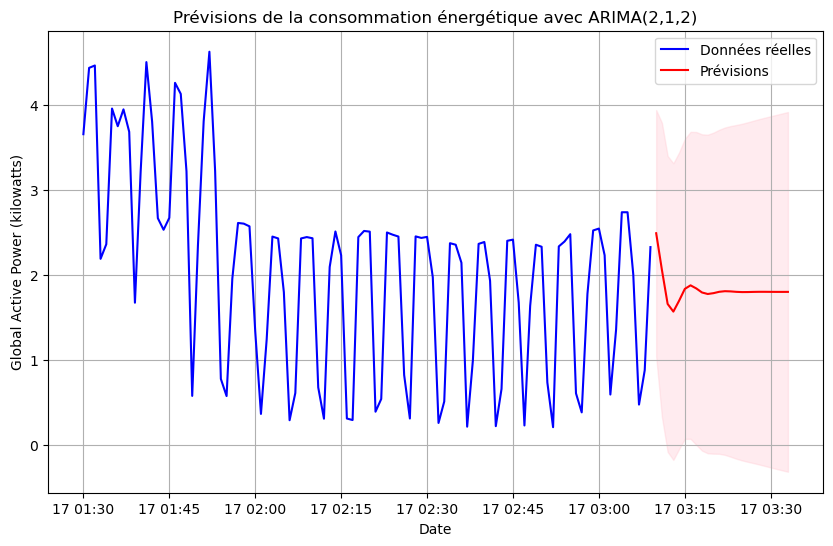

In [27]:
# Now that we have confirmed ARIMA(2, 1, 2) is the best model, we will fit it and generate predictions.

# Fitting the ARIMA(2, 1, 2) model
best_model = ARIMA(df['Global_active_power'], order=(2, 1, 2))
best_model_fit = best_model.fit()

# Forecasting future values (let's predict for the next 24 hours/minutes)
forecast_steps = 24
forecast = best_model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Convert forecast values to a pandas Series for easier handling
forecast_values_series = pd.Series(forecast_values, index=pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='T')[1:])

# Ensure confidence intervals are properly indexed
confidence_intervals.index = forecast_values_series.index

# Plotting actual data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Global_active_power'][-100:], label='Données réelles', color='blue')
plt.plot(forecast_values_series, label='Prévisions', color='red')
plt.fill_between(forecast_values_series.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Prévisions de la consommation énergétique avec ARIMA(2,1,2)')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid(True)
plt.show()
